# Proyecto **final**

### Estructura del proyecto:

- **Descripci√≥n del problema**
- **Investigaci√≥n de t√©cnicas de preprocesamiento**
- **Modelo propio**
  - Importaci√≥n de datos  
  - Exploraci√≥n de datos  
  - Preprocesamiento de im√°genes  
  - Modelos y ajuste de *hiperpar√°metros*  
  - Evaluaci√≥n del desempe√±o del modelo final  
- **Modelo creado mediante un LLM**
  - Prueba y evaluaci√≥n con un LLM





## Descripci√≥n del problema

**Problematica**: La clasificaci√≥n de im√°genes de resonancia magn√©tica (MRI) es una tarea com√∫n en el an√°lisis de patolog√≠as cerebrales. Sin embargo, debido a su frecuencia, pueden ocurrir errores humanos con consecuencias graves. Por ello, se busca reducir la carga del personal m√©dico automatizando la clasificaci√≥n de tumores. De esta forma, este proceso rutinario ser√° asistido por un modelo predictivo, lo que permitir√° disminuir el tiempo de diagn√≥stico. Adem√°s, esta soluci√≥n ser√° especialmente √∫til en regiones donde no se cuenta con profesionales capacitados para identificar este tipo de patolog√≠as.<br><br>

**Objetivo**: Crear un modelo de clasificacion el cual clasifique de la mejor manera posible distintas MRI, las categorias son las siguientes:


*   Glioma
*   Meningioma
*   Pituitario
*   No tumor





## Investigaci√≥n de t√©cnicas de preprocesamiento

### **Preprocesamiento de Im√°genes**

El preprocesamiento de im√°genes constituye una etapa cr√≠tica en sistemas de clasificaci√≥n basados en aprendizaje profundo, particularmente en el dominio m√©dico. En el contexto de la clasificaci√≥n de tumores cerebrales a partir de im√°genes de resonancia magn√©tica (MRI), esta fase no solo tiene por objetivo adecuar las im√°genes a los requerimientos computacionales del modelo, sino tambi√©n preservar aquellos aspectos cl√≠nicamente relevantes que permiten una interpretaci√≥n diagn√≥stica fiable, como la morfolog√≠a tumoral, el edema o la distribuci√≥n de estructuras intracraneales.

En este proyecto, se ha dise√±ado un pipeline de preprocesamiento alineado tanto con los requerimientos de arquitecturas de visi√≥n por computador como DINOv2, como con las exigencias del an√°lisis cl√≠nico de resonancias cerebrales. A trav√©s de una secuencia cuidadosamente seleccionada de transformaciones, se busca reducir la variabilidad t√©cnica del conjunto de datos sin comprometer su valor diagn√≥stico.

####**Redimensionamiento a 224x224 p√≠xeles**

El primer paso consisti√≥ en la normalizaci√≥n del tama√±o de las im√°genes a una resoluci√≥n fija de 224√ó224 p√≠xeles. Este tama√±o ha sido adoptado como est√°ndar en arquitecturas preentrenadas como Vision Transformers o ResNet, y su adopci√≥n en este proyecto garantiza la compatibilidad estructural con modelos como DINOv2. Desde una perspectiva m√©dica, estudios previos han demostrado que esta resoluci√≥n permite conservar detalles anat√≥micos suficientes para diferenciar entre tipos de tumores, incluso aquellos cuya manifestaci√≥n morfol√≥gica es sutil. Adem√°s, el uso de t√©cnicas de interpolaci√≥n adecuadas minimiza la distorsi√≥n geom√©trica y asegura la preservaci√≥n de las relaciones espaciales intracraneales.

####**Conversi√≥n a representaci√≥n num√©rica continua**

Una vez uniformizado el tama√±o, las im√°genes fueron transformadas a un formato num√©rico adaptado al procesamiento por redes neuronales profundas. Esta representaci√≥n contin√∫a permite que las intensidades de p√≠xel sean interpretadas de manera eficiente por el modelo, promoviendo una mejor propagaci√≥n del gradiente durante el entrenamiento. Adem√°s, la escala a un rango entre 0 y 1 reduce el riesgo de saturaci√≥n y mantiene intactas las diferencias de intensidad entre tejidos, esenciales en la detecci√≥n de anomal√≠as intracraneales.

####**Simulaci√≥n de variaciones de orientaci√≥n**

Dado que en la pr√°ctica cl√≠nica pueden existir variaciones menores en la posici√≥n del paciente o el √°ngulo del esc√°ner, se incluy√≥ una transformaci√≥n que simula rotaciones leves. Esta estrategia mejora la capacidad del modelo para identificar patrones tumorales de manera robusta ante cambios sutiles en la orientaci√≥n. Desde el punto de vista m√©dico, se ha demostrado que rotaciones controladas dentro de un rango reducido no afectan la fidelidad diagn√≥stica, y desde el enfoque computacional, esta t√©cnica act√∫a como una forma de aumento de datos que favorece la generalizaci√≥n.

####**Normalizaci√≥n estad√≠stica basada en el modelo preentrenado**

La fase final del preprocesamiento consisti√≥ en aplicar una normalizaci√≥n basada en las estad√≠sticas del conjunto de datos original con el que fue entrenado el modelo utilizado. Esta estrategia asegura que las im√°genes procesadas mantengan una distribuci√≥n similar a la de los datos originales del preentrenamiento, mejorando as√≠ la transferencia de conocimiento. Esta etapa tambi√©n permite eliminar variaciones no diagn√≥sticas en brillo o contraste, t√≠picas de diferencias entre esc√°neres, facilitando que el modelo enfoque su atenci√≥n en patrones verdaderamente patol√≥gicos.

Puesto que las im√°genes de resonancia magn√©tica son originalmente en escala de grises, se replic√≥ el canal de intensidad en tres matrices id√©nticas para generar una imagen compatible con modelos preentrenados que esperan entradas con tres canales. Esta pr√°ctica ha sido ampliamente validada en la literatura y no introduce artefactos visuales, preservando completamente el contenido cl√≠nico de la imagen.

###**Divisi√≥n estratificada del conjunto de datos**

Finalmente, el conjunto de im√°genes fue segmentado en subconjuntos de entrenamiento, validaci√≥n y prueba, utilizando una estrategia de partici√≥n estratificada. Esta divisi√≥n asegura que la proporci√≥n de cada clase tumoral se mantenga constante a trav√©s de los diferentes subconjuntos, evitando sesgos en el entrenamiento y evaluaci√≥n del modelo. Esta medida es especialmente importante en datasets m√©dicos, donde algunas clases representan patolog√≠as poco frecuentes pero cl√≠nicamente relevantes, cuya detecci√≥n precisa puede tener consecuencias significativas en la pr√°ctica m√©dica.

En su conjunto, estas transformaciones permiten preparar las im√°genes de manera que se mantenga su valor cl√≠nico, se reduzca el sesgo t√©cnico y se maximice el rendimiento del modelo en contextos reales de diagn√≥stico.

####**Transformaciones no aplicadas**

A pesar de la disponibilidad de m√∫ltiples t√©cnicas de aumento de datos en visi√≥n por computador, el dise√±o del pipeline deliberadamente excluy√≥ aquellas transformaciones que podr√≠an comprometer la validez cl√≠nica de las im√°genes. Por ejemplo, el recorte aleatorio podr√≠a eliminar regiones tumorales cr√≠ticas, mientras que transformaciones como el reflejo horizontal podr√≠an alterar la lateralidad cerebral, un par√°metro vital en neurolog√≠a. Asimismo, alteraciones como el ajuste de brillo o la introducci√≥n de ruido gaussiano podr√≠an distorsionar las intensidades naturales de los tejidos blandos, afectando la diferenciaci√≥n entre sustancia blanca, sustancia gris o l√≠quido cefalorraqu√≠deo.

Estas decisiones fueron fundamentadas tanto en criterios cl√≠nicos como en evidencia emp√≠rica, subrayando la importancia de adaptar el preprocesamiento al dominio m√©dico en lugar de aplicar t√©cnicas gen√©ricas sin consideraci√≥n del contexto.


#### **Referencias**


‚Ä¢	Evaluating the Impact of Intensity Normalization on MR Image. (2019). PLOS ONE. https://pmc.ncbi.nlm.nih.gov/articles/PMC6758567/

‚Ä¢ Medical image preprocessing for deep learning. (2023). Journal of Medical Imaging and Health Informatics, 13(4). https://pmc.ncbi.nlm.nih.gov/articles/PMC10662291/

‚Ä¢ Brain MRI Dataset resized to 224x224. (2022). Croatian Scientific Bibliography. https://hrcak.srce.hr/file/454546

‚Ä¢ Brain tumor classification from MRI scans. (2024). Journal of Imaging Science and Technology, 68(1). https://pmc.ncbi.nlm.nih.gov/articles/PMC10882068/

‚Ä¢ Brain Tumor Classification Framework Using Magnetic MRI. (2023). Applied Sciences, 13(18), 10521. https://www.mdpi.com/2076-3417/13/18/10521

‚Ä¢	Hussein, S., Gillies, R. J., Cao, K., Song, Y., & Bagci, U. (2022). Clinical guidelines for developing AI in radiology: Evaluation, robustness, and reproducibility. Radiology: Artificial Intelligence, 4(6). https://pubs.rsna.org/doi/full/10.1148/ryai.220061

‚Ä¢	PyTorch. (2024). torchvision.transforms ‚Äî Torchvision main documentation. https://pytorch.org/vision/stable/transforms.html

‚Ä¢	Hugging Face. (2024). DINOv2 model documentation. https://huggingface.co/docs/transformers/model_doc/dinov2




# Modelo Propio

##  Importacion de datos

**Librerias**: Usaremos pytorch como libreria motor para la red neuronal y el manejo del dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

base_dir = '/content/drive/My Drive/Proyecto/proyecto-final-iis-2025-1-unal/ISI_dataset'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
labels_path = os.path.join(base_dir, 'train_labels.csv')




## Exploracion de los datos

Hay 5718 Imagenes MRI

In [ ]:

import pandas as pd

labels = pd.read_csv(labels_path)

labels.shape
print(labels.head(30))
labels.shape


             id       label
0   img0001.jpg  meningioma
1   img0002.jpg      glioma
2   img0003.jpg   pituitary
3   img0004.jpg      glioma
4   img0005.jpg   pituitary
5   img0006.jpg   pituitary
6   img0007.jpg     notumor
7   img0008.jpg  meningioma
8   img0009.jpg   pituitary
9   img0010.jpg      glioma
10  img0011.jpg  meningioma
11  img0012.jpg     notumor
12  img0013.jpg     notumor
13  img0014.jpg   pituitary
14  img0015.jpg      glioma
15  img0016.jpg     notumor
16  img0017.jpg     notumor
17  img0018.jpg  meningioma
18  img0019.jpg  meningioma
19  img0020.jpg     notumor
20  img0021.jpg      glioma
21  img0022.jpg     notumor
22  img0023.jpg     notumor
23  img0024.jpg  meningioma
24  img0025.jpg  meningioma
25  img0026.jpg      glioma
26  img0027.jpg     notumor
27  img0028.jpg   pituitary
28  img0029.jpg   pituitary
29  img0030.jpg  meningioma


(5718, 2)

Aqui notamos como la clase de mayor numero es la de "notumor", y la de menor "glioma"

In [ ]:
class_counts = labels['label'].value_counts()
class_counts

label
notumor       1660
pituitary     1418
meningioma    1322
glioma        1318
Name: count, dtype: int64

 Visualizaci√≥n de im√°genes por clase

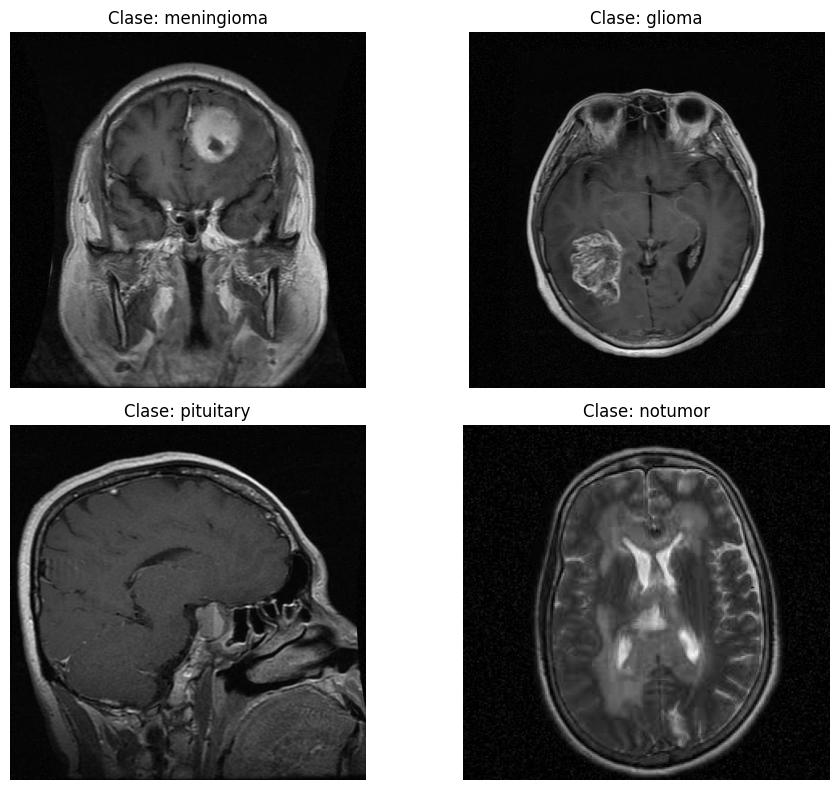

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Obtener un √≠ndice para cada clase.
# Utilizaremos la primera aparici√≥n de cada etiqueta en el DataFrame labels.
class_indices = {}
for index, row in labels.iterrows():
    label = row['label']
    if label not in class_indices:
        class_indices[label] = index
    if len(class_indices) == 4:
        break

plt.figure(figsize=(10, 8))

for i, (label, idx) in enumerate(class_indices.items()):
    img_name = labels.iloc[idx]['id']
    img_path = os.path.join(train_dir, img_name)

    try:
        image = Image.open(img_path)
        plt.subplot(2, 2, i + 1) # 2 filas, 2 columnas
        plt.imshow(image, cmap='gray')
        plt.title(f"Clase: {label}")
        plt.axis('off')
    except FileNotFoundError:
        print(f"Imagen no encontrada en la ruta: {img_path}")
    except Exception as e:
        print(f"Error al procesar la imagen {img_name}: {e}")

plt.tight_layout()
plt.show()

Imagenes Curiosas:

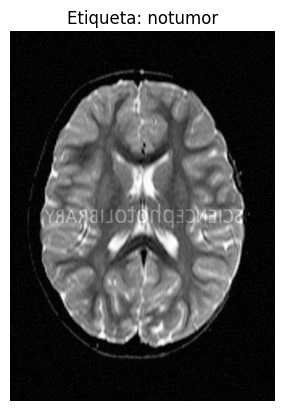

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

i = 711


# Obtener el nombre del archivo y su etiqueta
img_name = labels.iloc[i]['id']
label = labels.iloc[i]['label']

# Construir la ruta completa de la imagen
img_path = os.path.join(train_dir, img_name)

# Cargar y mostrar la imagen
image = Image.open(img_path)

plt.imshow(image, cmap = 'gray')
plt.title(f"Etiqueta: {label}")
plt.axis('off')
plt.show()

Algunas imagenes del set de entrenamiento tenian marcas de agua por encima de la radiografia

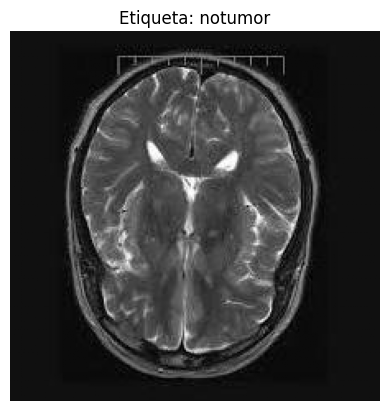

In [ ]:
i = 1064


# Obtener el nombre del archivo y su etiqueta
img_name = labels.iloc[i]['id']
label = labels.iloc[i]['label']

# Construir la ruta completa de la imagen
img_path = os.path.join(test_dir, img_name)

# Cargar y mostrar la imagen
image = Image.open(img_path)

plt.imshow(image, cmap = 'gray')
plt.title(f"Etiqueta: {label}")
plt.axis('off')
plt.show()

Sin embargo no se consider√≥ eliminarlas ya que dentro de las im√°genes de test tambien habian algunas con estas caracteristicas, van a ser utiles para el entrenamiento

Tama√±o de la imagen:

In [ ]:
print(image.mode)
print(image.size)

L
(225, 225)


In [ ]:
from collections import Counter


# Obtener todos los nombres de archivo en la carpeta
image_files = os.listdir(train_dir)

# Lista para guardar tama√±os
sizes = []

# Recorrer las im√°genes
for img_file in image_files:
    img_path = os.path.join(train_dir, img_file)
    try:
        with Image.open(img_path) as img:
            sizes.append(img.size)  # (ancho, alto)
    except:
        print(f"Error al abrir {img_file}")

# Contar ocurrencias de cada tama√±o
size_counts = Counter(sizes)

# Mostrar en DataFrame ordenado
size_df = pd.DataFrame(size_counts.items(), columns=['Tama√±o (ancho, alto)', 'Cantidad'])
size_df = size_df.sort_values(by='Cantidad', ascending=False)

print(size_df)



    Tama√±o (ancho, alto)  Cantidad
0             (512, 512)      3839
1             (225, 225)       280
21            (630, 630)        77
5             (236, 236)        64
7             (201, 251)        50
..                   ...       ...
354           (421, 486)         1
355           (439, 512)         1
356           (453, 496)         1
357           (286, 356)         1
358           (225, 218)         1

[359 rows x 2 columns]


Notamos que los datos son muy hetereogeneos, tenemos 359 diferentes tama√±os de imagenes, siendo la mas comun 512 x 512, debemos normalizar.

In [ ]:
# Tomar una muestra de im√°genes
sample_images = os.listdir(train_dir)[970:1000]

for img_name in sample_images:
    img_path = os.path.join(train_dir, img_name)
    with Image.open(img_path) as img:
            # Verificar canal de color
            print(f"Imagen: {img_name}, Canal de color (Mode): {img.mode}")
            img_array = np.array(img)
            print(f"  Rango de intensidad: Min={img_array.min()}, Max={img_array.max()} \n")


Imagen: img5702.jpg, Canal de color (Mode): L
  Rango de intensidad: Min=0, Max=255 

Imagen: img5715.jpg, Canal de color (Mode): L
  Rango de intensidad: Min=0, Max=253 

Imagen: img5701.jpg, Canal de color (Mode): L
  Rango de intensidad: Min=0, Max=255 

Imagen: img5698.jpg, Canal de color (Mode): L
  Rango de intensidad: Min=0, Max=255 

Imagen: img5716.jpg, Canal de color (Mode): L
  Rango de intensidad: Min=0, Max=144 

Imagen: img5718.jpg, Canal de color (Mode): L
  Rango de intensidad: Min=0, Max=255 

Imagen: img5717.jpg, Canal de color (Mode): L
  Rango de intensidad: Min=0, Max=255 

Imagen: img5711.jpg, Canal de color (Mode): L
  Rango de intensidad: Min=0, Max=255 

Imagen: img5708.jpg, Canal de color (Mode): L
  Rango de intensidad: Min=0, Max=255 

Imagen: img5694.jpg, Canal de color (Mode): L
  Rango de intensidad: Min=0, Max=255 

Imagen: img5700.jpg, Canal de color (Mode): L
  Rango de intensidad: Min=0, Max=254 

Imagen: img5691.jpg, Canal de color (Mode): L
  Rango 

Vemos como la mayor√≠a de tus im√°genes son im√°genes de escala de grises que utilizan casi todo el rango de intensidad

## Preprocesamiento de im√°genes


Iniciamos eliminando algunas imagenes corruptas que a nuestro criterio, no eran utiles para los datos de entrenamiento y por lo contrario podrian generar problemas en la red.

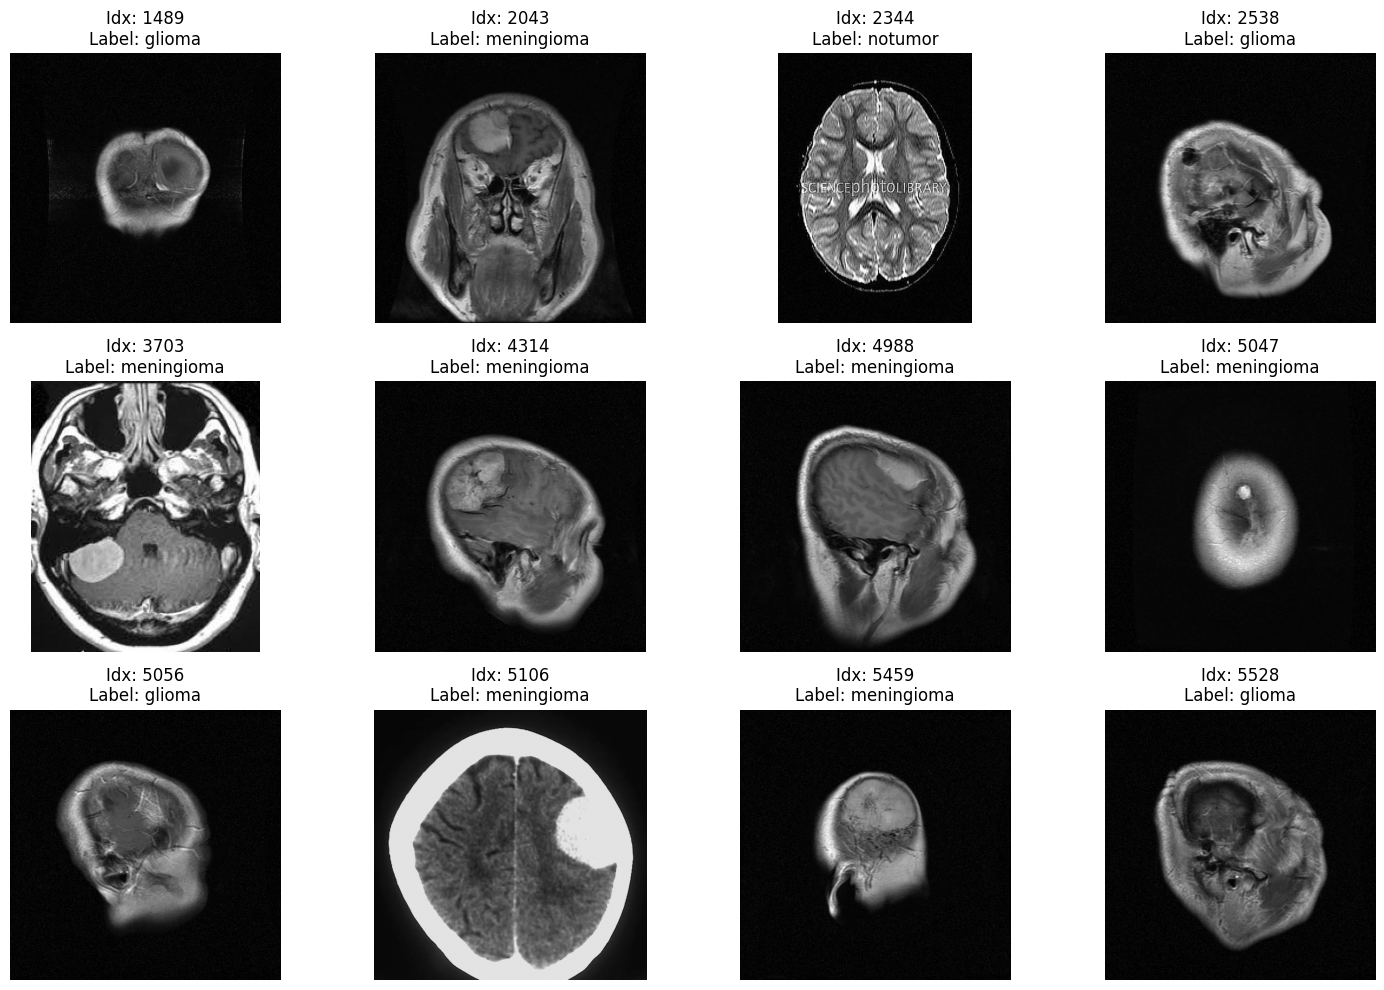

In [ ]:
indices_to_show = [1489, 2043, 2344, 2538, 3703, 4314, 4988, 5047, 5056, 5106, 5459, 5528]

plt.figure(figsize=(15, 10)) # Ajusta el tama√±o para mostrar varias im√°genes

for i, idx in enumerate(indices_to_show):
    if idx < len(labels): # Asegurarse de que el √≠ndice es v√°lido
        img_name = labels.iloc[idx]['id']
        label = labels.iloc[idx]['label']
        img_path = os.path.join(train_dir, img_name)

        try:
            image = Image.open(img_path)
            plt.subplot(3, 4, i + 1) # 3 filas, 4 columnas
            plt.imshow(image, cmap='gray')
            plt.title(f"Idx: {idx}\nLabel: {label}")
            plt.axis('off')
        except FileNotFoundError:
            print(f"Imagen no encontrada en la ruta: {img_path}")
        except Exception as e:
            print(f"Error al procesar la imagen {img_name}: {e}")
    else:
        print(f"√çndice {idx} fuera de rango del DataFrame.")

plt.tight_layout()
plt.show()

Algunas de estas son confusas otras tienen marcas de agua demasiado marcadas, sin embargo seria util confirmar con un experto sobre la utilidad de estas radiografias

In [ ]:

indices_to_remove = [1489, 2043, 2344, 2538, 3703, 4314, 4988, 5047, 5056, 5106, 5459, 5528]


filtered_labels = labels.drop(indices_to_remove).reset_index(drop=True)


Tambien generamos la secuencia de transformaciones para que la imagen este Lista para ser usada como entrada en el modelo DinoV2 y la red neuronal

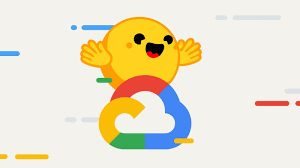


Entre las transformaciones se incluyen:


*   Las im√°genes se redimensionan a 224x224 p√≠xeles
*   Se rotan aleatoriamente hasta 15 grados
*   Se convierten a tensor escalando p√≠xeles a [0,1]
*   Se normalizan usando el preprocesador de DINOv2




In [ ]:
# PyTorch
import torch
from torchvision import transforms

# Hugging Face Transformers para DINOv2
from transformers import AutoImageProcessor

processor = AutoImageProcessor.from_pretrained("facebook/dinov2-base")

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomRotation(degrees=15),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: processor(images=x, return_tensors="pt", do_rescale=False)["pixel_values"][0])
])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/436 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


## Modelo y ajuste de hiperpar√°metros



*   Decidimos utilizar las funcionalidades de pytorch junto con el modelo preentrenado de DinoV2. (Transfer learning)




1) Preparacion del dataset para compatibilidad con pytorch

In [ ]:
from torch.utils.data import Dataset

class TumorDataset(Dataset):
    def __init__(self, dataframe, images_dir, transform=None):
        self.df = dataframe
        self.images_dir = images_dir
        self.transform = transform
        self.label_to_idx = {
            'notumor': 0,
            'pituitary': 1,
            'meningioma': 2,
            'glioma': 3
        }

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_name = self.df.iloc[idx]['id']   # ‚Üê cambio aqu√≠
        label_name = self.df.iloc[idx]['label']
        label = self.label_to_idx[label_name]

        img_path = os.path.join(self.images_dir, img_name)
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image, label

3) Creamos el Dataset y el Dataloader para Los datos de entrenamiento, validacion y test

De esta manera confirmamos que el modelo no se esta aprendiendo de memoria nuestras imagenes de entrenamiento

In [ ]:
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

# Primero dividimos entre entrenamiento (80%) y lo dem√°s (20%)
train_df, temp_df = train_test_split(
    filtered_labels,
    test_size=0.2,
    random_state=918,
    stratify=filtered_labels['label']
)

# Luego dividimos lo dem√°s entre validaci√≥n y test (10% y 10%)
val_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,
    random_state=918,
    stratify=temp_df['label']
)

train_dataset = TumorDataset(train_df, train_dir, transform=transform)
val_dataset = TumorDataset(val_df, train_dir, transform=transform)
test_dataset = TumorDataset(test_df, train_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
images, filtered_labels = next(iter(train_loader))
print("forma de las im√°genes:", images.shape)
print("Etiquetas:", labels[:8])

forma de las im√°genes: torch.Size([32, 3, 224, 224])
Etiquetas:             id       label
0  img0001.jpg  meningioma
1  img0002.jpg      glioma
2  img0003.jpg   pituitary
3  img0004.jpg      glioma
4  img0005.jpg   pituitary
5  img0006.jpg   pituitary
6  img0007.jpg     notumor
7  img0008.jpg  meningioma


Tenemos lotes con 32 imagenes, 3 canales de color RGb Y de tama√±o 224 x 224.


In [ ]:
print("Train class distribution:\n", train_df['label'].value_counts())
print("Validation class distribution:\n", val_df['label'].value_counts())
print("Test class distribution:\n", test_df['label'].value_counts())

Train class distribution:
 label
notumor       1327
pituitary     1134
meningioma    1052
glioma        1051
Name: count, dtype: int64
Validation class distribution:
 label
notumor       166
pituitary     142
glioma        132
meningioma    131
Name: count, dtype: int64
Test class distribution:
 label
notumor       166
pituitary     142
meningioma    132
glioma        131
Name: count, dtype: int64


### 4) Pasamos las imagenes por Dino V2

Cargamos el modelo


In [ ]:
from transformers import AutoModel

dinov2 = AutoModel.from_pretrained("facebook/dinov2-base")

for param in dinov2.parameters():
    param.requires_grad = False  # <-- Esto congela DINOv2

dinov2.eval()  # No vamos a entrenar DINOv2
dinov2 = dinov2.to("cuda" if torch.cuda.is_available() else "cpu")

config.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Pasamos un batch de imagenes por DinoV2 y obtenemos sus caracteristicas (CLS), esto es util para establecer el tama√±o de nuestra red



In [ ]:
# Obtener un batch del dataloader
images, labels = next(iter(train_loader))
images = images.to(dinov2.device)

# Desactivar gradientes (no vamos a entrenar DINOv2)
with torch.no_grad():
    outputs = dinov2(pixel_values=images)
    features = outputs.last_hidden_state[:, 0, :]  # ---> Leemos la iinformacion del primer vector, que es donde se resume la informacion de toda la imagen.
print(features.shape)

torch.Size([32, 768])


DinoV2, nos describe una imagen con un vector de 768 dimensiones

5) Creamos una red neuronal interprete

Esta es una red neuronal simple que utilizamos unicamente en el entorno del colab

In [ ]:
import torch.nn as nn

classifier = nn.Sequential(
    nn.Linear(768, 256),
    nn.ReLU(),
    nn.Linear(256, 4)
).to(dinov2.device)

La red neuronal que utilizamos de manera local fue la siguiente:

Utilizamos 2 tecnicas de regularizaci√≥n:


*   **Dropout**: Significa la probabilidad de que una neurona se apague, esto ayuda a que las neuronas por si mismas sean menos dependientes a las demas previniendo el sobreajuste.
*   **Batch Normalization**: No tenemos muy claro su funcionamiento en si pero acelera el entrenamiento y la convergencia. Nos di√≥ resultado üôÇ



In [ ]:
classifier_local = nn.Sequential(
    nn.Linear(768, 1024),
    nn.BatchNorm1d(1024),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(1024, 512),
    nn.BatchNorm1d(512),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(512, 256),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    nn.Linear(256, 4)
).to(dinov2.device)

Resumen de la red neuronal propia

In [ ]:
from torchsummary import summary

# Mueve el modelo a la GPU o CPU de lo contrario
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
classifier.to(device)

# DINOv2 genera vectores de tama√±o 768
summary(classifier_local, input_size=(768,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1024]         787,456
       BatchNorm1d-2                 [-1, 1024]           2,048
              ReLU-3                 [-1, 1024]               0
           Dropout-4                 [-1, 1024]               0
            Linear-5                  [-1, 512]         524,800
       BatchNorm1d-6                  [-1, 512]           1,024
              ReLU-7                  [-1, 512]               0
           Dropout-8                  [-1, 512]               0
            Linear-9                  [-1, 256]         131,328
      BatchNorm1d-10                  [-1, 256]             512
             ReLU-11                  [-1, 256]               0
           Linear-12                    [-1, 4]           1,028
Total params: 1,448,196
Trainable params: 1,448,196
Non-trainable params: 0
---------------------------

6) Definimos funcion de perdida y el optimizador

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(classifier.parameters(), lr=1e-4, weight_decay=1e-5)

weight_decay ayuda al clasificador a generalizar mejor y evitar sobreajustarse penalizando pesos grandes

7) Funcion de entrenamiento

In [ ]:
def train_loop(dataloader, dinov2, classifier, loss_fn, optimizer, device):
    classifier.train()
    dinov2.eval()  # No entrenamos DINOv2

    running_loss = 0.0
    correct = 0
    total = 0

    for batch_idx, (images, labels) in enumerate(dataloader):
        images, labels = images.to(device), labels.to(device)

        with torch.no_grad():
            try:
                outputs = dinov2(images)
                features = outputs.last_hidden_state[:, 0, :]  # CLS token
            except Exception as e:
                print(f"Error en DINOv2 forward pass: {e}")
                continue

        logits = classifier(features)
        loss = loss_fn(logits, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        correct += (logits.argmax(1) == labels).sum().item()
        total += labels.size(0)

        if batch_idx % 10 == 0:
            print(f"\t[Lote {batch_idx}] P√©rdida: {loss.item():.4f}")

    avg_loss = running_loss / len(dataloader)
    accuracy = correct / total
    print(f"\t Entrenamiento: {(100 * accuracy):.1f}% / P√©rdida: {avg_loss:.4f}")
    return avg_loss, accuracy

8) Funcion de validacion

In [ ]:
def val_loop(dataloader, dinov2, classifier, loss_fn, device):
    classifier.eval()
    dinov2.eval()

    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for batch_idx, (images, labels) in enumerate(dataloader):
            images, labels = images.to(device), labels.to(device)

            try:
                outputs = dinov2(images)
                features = outputs.last_hidden_state[:, 0, :]
            except Exception as e:
                print(f"Error en DINOv2 durante validaci√≥n: {e}")
                continue

            logits = classifier(features)
            loss = loss_fn(logits, labels)

            running_loss += loss.item()
            correct += (logits.argmax(1) == labels).sum().item()
            total += labels.size(0)

    avg_loss = running_loss / len(dataloader)
    accuracy = correct / total
    print(f"\t Validaci√≥n: {(100 * accuracy):.1f}% / P√©rdida: {avg_loss:.4f}\n")
    return avg_loss, accuracy

9) Entrenamos la red neuronal

En el modelo utilizado para la competencia se hicieron 32 EPOCHS en un entorno local. El uso de la GPU de colab es limitado, por eso se decide mostrar un modelo disntinto con solo 8 EPOCHS

Elegimos el numero de EPOCHS con la siguiente logica, si luego de 8 iteraciones el accuracy de la prediccion sobre los datos de validacion no mejoraba, el entrenamiento se detenia. La red neuronal no mostro mejora despues de 32 EPOCHS

In [ ]:
#EPOCHS = 32
EPOCHS = 8
best_val_acc = 0.0

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(EPOCHS):
    print(f"\n EPOCHS {epoch + 1}/{EPOCHS}")
    print("-" * 40)

    train_loss, train_acc = train_loop(train_loader, dinov2, classifier, criterion, optimizer, device)
    val_loss, val_acc = val_loop(val_loader, dinov2, classifier, criterion, device)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(classifier.state_dict(), "/content/drive/MyDrive/Proyecto/mejor_modelo(Colab).pth")
        print("\t Mejor modelo guardado con accuracy:", f"{100 * val_acc:.2f}%")

print("\n ¬°Entrenamiento completo!")


 EPOCHS 1/8
----------------------------------------
	[Lote 0] P√©rdida: 1.3818
	[Lote 10] P√©rdida: 1.0307
	[Lote 20] P√©rdida: 1.0412
	[Lote 30] P√©rdida: 0.7865
	[Lote 40] P√©rdida: 0.6916
	[Lote 50] P√©rdida: 0.7529
	[Lote 60] P√©rdida: 0.5378
	[Lote 70] P√©rdida: 0.6500
	[Lote 80] P√©rdida: 0.5980
	[Lote 90] P√©rdida: 0.5078
	[Lote 100] P√©rdida: 0.5650
	[Lote 110] P√©rdida: 0.5576
	[Lote 120] P√©rdida: 0.4425
	[Lote 130] P√©rdida: 0.4212
	[Lote 140] P√©rdida: 0.4649
	 Entrenamiento: 76.2% / P√©rdida: 0.6664
	 Validaci√≥n: 85.6% / P√©rdida: 0.4329

	 Mejor modelo guardado con accuracy: 85.64%

 EPOCHS 2/8
----------------------------------------
	[Lote 0] P√©rdida: 0.5088
	[Lote 10] P√©rdida: 0.3775
	[Lote 20] P√©rdida: 0.4010
	[Lote 30] P√©rdida: 0.2620
	[Lote 40] P√©rdida: 0.5079
	[Lote 50] P√©rdida: 0.3375
	[Lote 60] P√©rdida: 0.3219
	[Lote 70] P√©rdida: 0.3265
	[Lote 80] P√©rdida: 0.2976
	[Lote 90] P√©rdida: 0.4198
	[Lote 100] P√©rdida: 0.2989
	[Lote 110] P√©rdida: 0.4091
	[L

## Evaluacion del desempe√±o del modelo (Colab)

  Graficamos el accuracy y loss para ver claramente la curva de aprendizaje

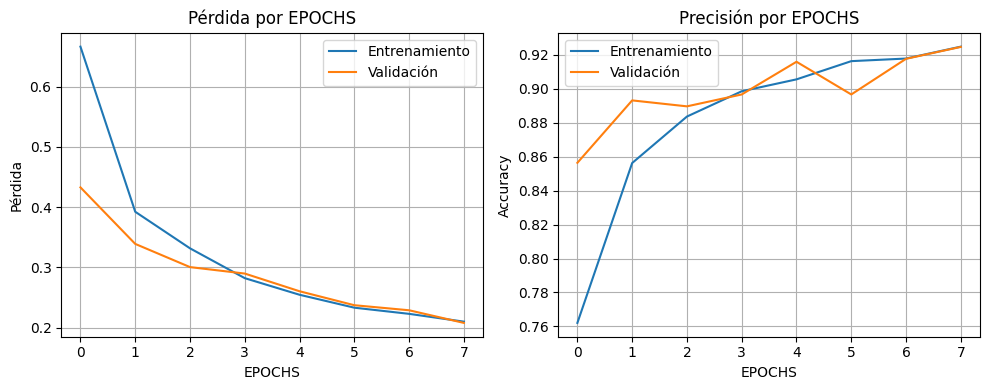

In [ ]:
# Gr√°fica de Loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Entrenamiento')
plt.plot(val_losses, label='Validaci√≥n')
plt.title('P√©rdida por EPOCHS')
plt.xlabel('EPOCHS')
plt.ylabel('P√©rdida')
plt.legend()
plt.grid(True)

# Gr√°fica de Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Entrenamiento')
plt.plot(val_accuracies, label='Validaci√≥n')
plt.title('Precisi√≥n por EPOCHS')
plt.xlabel('EPOCHS')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Durante estas pocas iteraciones no se evidencia sobreajuste claro; sin embargo, en la iteraci√≥n 5, el *accuracy* de la validaci√≥n estuvo por debajo que el de entrenamiento, pero este vuelve a valores de aprendizaje normales en las siguientes iteraciones.

Hacemos una prueba final en nuestro subconjunto de Test, utilizando el modelo entrenado localmente

In [ ]:
classifier.load_state_dict(torch.load("/content/drive/MyDrive/Proyecto/mejor_modelo(3).pth"))
classifier.to(device)
classifier.eval()

Sequential(
  (0): Linear(in_features=768, out_features=1024, bias=True)
  (1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout(p=0.4, inplace=False)
  (4): Linear(in_features=1024, out_features=512, bias=True)
  (5): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ReLU()
  (7): Dropout(p=0.3, inplace=False)
  (8): Linear(in_features=512, out_features=256, bias=True)
  (9): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): ReLU()
  (11): Linear(in_features=256, out_features=4, bias=True)
)

In [ ]:
def test_loop(dataloader, dinov2, classifier, loss_fn, device):
    classifier.eval()
    dinov2.eval()

    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)

            try:
                outputs = dinov2(images)
                features = outputs.last_hidden_state[:, 0, :]
            except Exception as e:
                print(f"Error en DINOv2 forward pass: {e}")
                continue

            logits = classifier(features)
            loss = loss_fn(logits, labels)

            running_loss += loss.item()
            correct += (logits.argmax(1) == labels).sum().item()
            total += labels.size(0)

    avg_loss = running_loss / len(dataloader)
    accuracy = correct / total

    print(f"Evaluaci√≥n en test: {100 * accuracy:.2f}% / P√©rdida: {avg_loss:.4f}")
    return avg_loss, accuracy

In [ ]:
test_loss, test_acc = test_loop(test_loader, dinov2, classifier, criterion, device)

Evaluaci√≥n en test: 97.38% / P√©rdida: 0.0722


97.38% de precision, el modelo esta clasificando de manera correcta la gran mayoria de los datos de test. üôÇ

### Metricas

Librerias a importar para las metricas

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
from torch.nn.functional import softmax

labels_names = ['notumor', 'pituitary', 'meningioma', 'glioma']
idx_to_class = {0: 'notumor', 1: 'pituitary', 2: 'meningioma', 3: 'glioma'}

all_labels = []
all_preds = []
all_probs = []

classifier.eval()
dinov2.eval()

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = dinov2(images)
        features = outputs.last_hidden_state[:, 0, :]
        logits = classifier(features)
        probs = softmax(logits, dim=1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(torch.argmax(probs, dim=1).cpu().numpy())
        all_probs.extend(probs.cpu().numpy())


Recall (macro)

In [ ]:
from sklearn.metrics import recall_score

recall = recall_score(all_labels, all_preds, average="macro")
print(f"Recall macro: {recall:.4f}")

Recall macro: 0.9717


Recall por clase

In [ ]:

print(classification_report(all_labels, all_preds, target_names=labels_names))

              precision    recall  f1-score   support

     notumor       0.99      1.00      1.00       166
   pituitary       0.97      0.99      0.98       142
  meningioma       0.96      0.94      0.95       132
      glioma       0.96      0.95      0.96       132

    accuracy                           0.97       572
   macro avg       0.97      0.97      0.97       572
weighted avg       0.97      0.97      0.97       572



Accuracy Global

In [ ]:
acc = accuracy_score(all_labels, all_preds)
print(f"Accuracy global: {acc:.4f}")

Accuracy global: 0.9738


Metrica compuesta

In [ ]:
composite = (acc + recall) / 2
print(f"M√©trica compuesta: {composite:.4f}")

M√©trica compuesta: 0.9728


Matriz de confusion

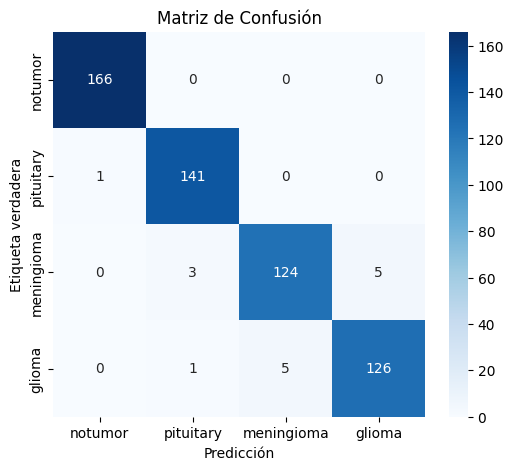

In [ ]:


cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels_names, yticklabels=labels_names)
plt.xlabel("Predicci√≥n")
plt.ylabel("Etiqueta verdadera")
plt.title("Matriz de Confusi√≥n")
plt.show()


Aqui vemos un dato muy interesante y positivo del modelo. No clacifico como 'sin tumor' ning√∫n caso real de tumor en el conjunto de prueba. Aspecto critico para el diagnostico medico.

Curva ROC

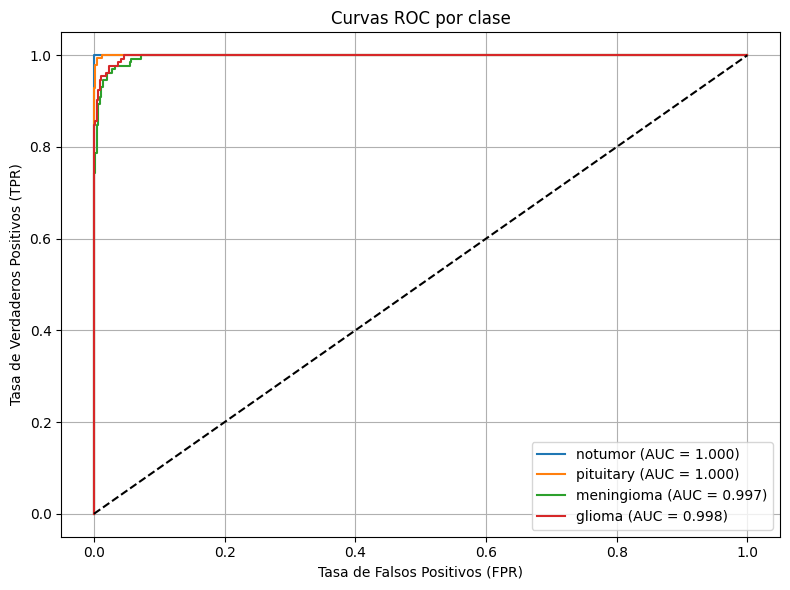

In [ ]:
y_true_bin = label_binarize(all_labels, classes=[0, 1, 2, 3])
all_probs = np.array(all_probs)
n_classes = y_true_bin.shape[1]

fpr = {}
tpr = {}
roc_auc = {}

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], all_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f"{labels_names[i]} (AUC = {roc_auc[i]:.3f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("Curvas ROC por clase")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

Vizualizacion de errores

Retornamos las imagenes a un estado original

In [ ]:
imagenet_mean = [0.485, 0.456, 0.406]  #valores usados por DINO v2 para normalizar las imagenes
imagenet_std = [0.229, 0.224, 0.225]

def denormalize_dino(tensor):
    mean = torch.tensor(imagenet_mean).view(3, 1, 1).to(tensor.device)
    std = torch.tensor(imagenet_std).view(3, 1, 1).to(tensor.device)
    return tensor * std + mean

In [ ]:
wrong_images = []
wrong_preds = []
wrong_labels = []

classifier.eval()
dinov2.eval()

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = dinov2(images)
        features = outputs.last_hidden_state[:, 0, :]
        logits = classifier(features)
        preds = logits.argmax(1)

        # Comparar predicciones con etiquetas reales
        for i in range(len(labels)):
            if preds[i] != labels[i]:
                wrong_images.append(images[i].cpu())
                wrong_preds.append(preds[i].item())
                wrong_labels.append(labels[i].item())

Ejemplo de 3 imagenes mal etiquetadas

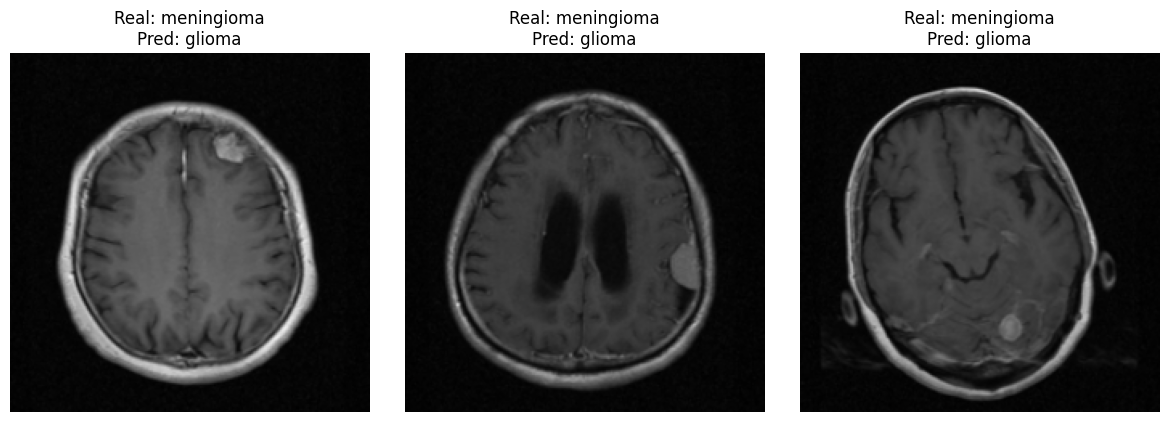

In [ ]:
n = 3
plt.figure(figsize=(12, 8))

for i in range(n):
    img = denormalize_dino(wrong_images[i]).clamp(0, 1)  # Asegura valores en [0,1]
    img = img.permute(1, 2, 0).cpu().numpy()              # [Canal, Height, Width] ‚Üí [H, W, C]

    true_label = idx_to_class[wrong_labels[i]]
    pred_label = idx_to_class[wrong_preds[i]]

    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(f"Real: {true_label}\nPred: {pred_label}")
    plt.axis("off")

plt.tight_layout()
plt.show()

## Generar CSV pera el test real

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
classifier.load_state_dict(torch.load("/content/drive/MyDrive/Proyecto/mejor_modelo(3).pth"))
classifier.eval()
dinov2.eval()

idx_to_label = {0: "notumor", 1: "pituitary", 2: 'meningioma', 3: 'glioma'}

# Lista de archivos en test_dir
test_filenames = sorted(os.listdir(test_dir))

results = []

# Generar predicciones
with torch.no_grad():
    for filename in test_filenames:
        img_path = os.path.join(test_dir, filename)
        image = Image.open(img_path).convert("RGB")
        image = transform(image).unsqueeze(0).to(device) #La transformamos y le creamos la variable lote que sea de 1

        features = dinov2(image).last_hidden_state[:, 0, :]
        logits = classifier(features)
        predicted_class = torch.argmax(logits, dim=1).item()
        predicted_label = idx_to_label[predicted_class]

        results.append({"id": filename, "label": predicted_label})

# Guardar CSV
df_submission = pd.DataFrame(results)
df_submission.to_csv("submissionModel.csv", index=False)


## G. Evaluaci√≥n del modelo LLM (Multimodal)

Esta secci√≥n presenta la evaluaci√≥n del desempe√±o del modelo LLM (basado en an√°lisis multimodal) en la clasificaci√≥n de im√°genes de resonancia magn√©tica cerebral. El an√°lisis incluye m√©tricas cl√°sicas de desempe√±o, una tabla de predicciones y reflexiones sobre el comportamiento observado.


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle


In [ ]:
# Cargar datos desde el archivo final integrado
merged_final_cleaned = pd.read_csv("/content/drive/My Drive/Proyecto/merged_llm_results_final.csv")
merged_final_cleaned.head()

Unnamed: 0    image llm_prediction  \
0           0  img0001        notumor   
1           1  img0002         glioma   
2           2  img0003      pituitary   
3           3  img0004        notumor   
4           4  img0005     meningioma   

                                       justification       id  
0  Lesiones m√É¬∫ltiples en sustancia blanca, patr√É...  img0001  
1  Masa infiltrante con edema circundante, t√É¬≠pic...  img0002  
2                  Lesi√É¬≥n localizada en silla turca  img0003  
3  Distribuci√É¬≥n difusa, compatible con enfermeda...  img0004  
4   Lesi√É¬≥n bien delimitada adyacente a la duramadre  img0005

In [ ]:
# Normalizar etiquetas para asegurar consistencia
merged_final_cleaned["llm_pediction"] = merged_final_cleaned["llm_prediction"].replace({
    "No tumor": "notumor", "Glioma": "glioma", "Pituitario": "pituitary", "Meningioma": "meningioma"
})


In [ ]:

y_true = labels['label'].head(30).reset_index(drop=True)
y_pred = merged_final_cleaned["llm_prediction"].head(30).reset_index(drop=True)

y_pred = y_pred.replace({
    "No tumor": "notumor", "Glioma": "glioma", "Pituitario": "pituitary", "Meningioma": "meningioma"
})

# C√°lculo de m√©tricas
accuracy = accuracy_score(y_true, y_pred)
recall_macro = recall_score(y_true, y_pred, average="macro")
composite_metric = (accuracy + recall_macro) / 2

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall macro: {recall_macro:.4f}")
print(f"M√©trica compuesta (accuracy + recall_macro)/2: {composite_metric:.4f}")



Accuracy: 0.1667
Recall macro: 0.1677
M√©trica compuesta (accuracy + recall_macro)/2: 0.1672


In [ ]:
# Create a DataFrame for comparison
comparison_df_metrics = pd.DataFrame({
    'True_Label': y_true,
    'Predicted_Label': y_pred
})

# Display the DataFrame
display(comparison_df_metrics)

True_Label Predicted_Label
0   meningioma         notumor
1       glioma          glioma
2    pituitary       pituitary
3       glioma         notumor
4    pituitary      meningioma
5    pituitary         notumor
6      notumor          glioma
7   meningioma       pituitary
8    pituitary      meningioma
9       glioma         notumor
10  meningioma          glioma
11     notumor         notumor
12     notumor       pituitary
13   pituitary      meningioma
14      glioma         notumor
15     notumor          glioma
16     notumor       pituitary
17  meningioma         notumor
18  meningioma      meningioma
19     notumor          glioma
20      glioma         notumor
21     notumor       pituitary
22     notumor          glioma
23  meningioma      meningioma
24  meningioma         notumor
25      glioma       pituitary
26     notumor      meningioma
27   pituitary         notumor
28   pituitary          glioma
29  meningioma         notumor

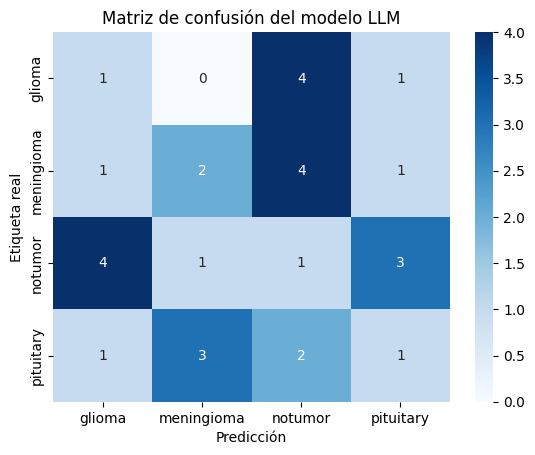

In [ ]:
# Matriz de confusi√≥n
cm = confusion_matrix(y_true, y_pred, labels=["glioma", "meningioma", "notumor", "pituitary"])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["glioma", "meningioma", "notumor", "pituitary"], yticklabels=["glioma", "meningioma", "notumor", "pituitary"])
plt.xlabel("Predicci√≥n")
plt.ylabel("Etiqueta real")
plt.title("Matriz de confusi√≥n del modelo LLM")
plt.show()


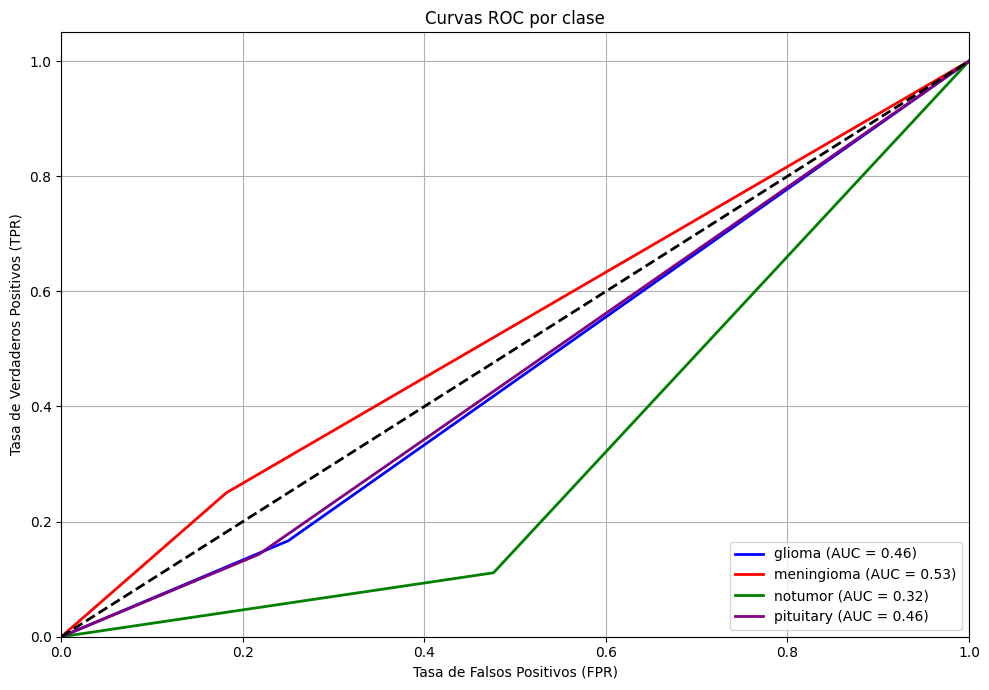

In [ ]:
# Curvas ROC
classes = sorted(y_true.unique())
y_true_bin = label_binarize(y_true, classes=classes)
y_pred_bin = label_binarize(y_pred, classes=classes)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i, cls in enumerate(classes):
    fpr[cls], tpr[cls], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[cls] = auc(fpr[cls], tpr[cls])

plt.figure(figsize=(10, 7))
colors = cycle(['blue', 'red', 'green', 'purple'])
for cls, color in zip(classes, colors):
    plt.plot(fpr[cls], tpr[cls], color=color, lw=2, label=f'{cls} (AUC = {roc_auc[cls]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curvas ROC por clase")
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()


### An√°lisis de desempe√±o del modelo LLM

El modelo LLM mostr√≥ un desempe√±o limitado en t√©rminos de exactitud y cobertura macro promedio. Aunque algunas clases como "notumor" lograron una buena tasa de detecci√≥n, otras como "glioma" o "pituitary" presentaron confusi√≥n con categor√≠as similares.

**T√©cnicas que ayudaron:** El uso de prompts enriquecidos con contexto cl√≠nico y formato de respuesta estructurado mejor√≥ la coherencia de las respuestas. Sin embargo, no fue suficiente para garantizar una clasificaci√≥n √≥ptima.

**Limitaciones observadas:** El modelo present√≥ errores cl√≠nicos al confundir tumores con condiciones benignas o no tumorales. La falta de consistencia y el sesgo hacia clases mayoritarias tambi√©n limitaron su confiabilidad.

**Ventajas sobre modelos tradicionales:** La principal ventaja del LLM fue su capacidad de razonamiento expl√≠cito, ofreciendo justificaciones cl√≠nicas en lenguaje natural. Adem√°s, no requiere entrenamiento y puede operar con bajo costo computacional, lo cual lo hace accesible para escenarios con recursos limitados.

**Consideraciones finales:** Dado que solo se evaluaron 30 im√°genes, los resultados no deben generalizarse sin reservas. Aun as√≠, este an√°lisis resalta el potencial y las limitaciones actuales de modelos LLM en tareas cl√≠nicas de visi√≥n por computador.
